# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Files Submited:-
* Writeup.html
>* contains writeup and code
* Traffic_Sign_Classifier.ipynb
>* contains executable code

---
## Step 0: Load The Data

In [1]:
#to enabled preprocessing, if 0 loaded from pickle
preprocessing_flag = 0

#to enabled training, if 0 then loaded from pickle
training_flag = 0

#if enabled images and graphs displayed, else are not
show_visualization_flag = 1

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file = "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

#print (np.shape(X_train))
# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
#class names dictionary (make elegant later)
import csv
class_names = dict()
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        class_names[int(row[0])] = row[1]

In [5]:
#class wise distribution (make elegant later)
class_dist = dict()
for i in range(n_train):
    if y_train[i] in class_dist:
        class_dist[y_train[i]].append(X_train[i])
    else:
        class_dist[y_train[i]] = [X_train[i]]

#print(type(class_dist))

## Visualise sample Images of all Classes

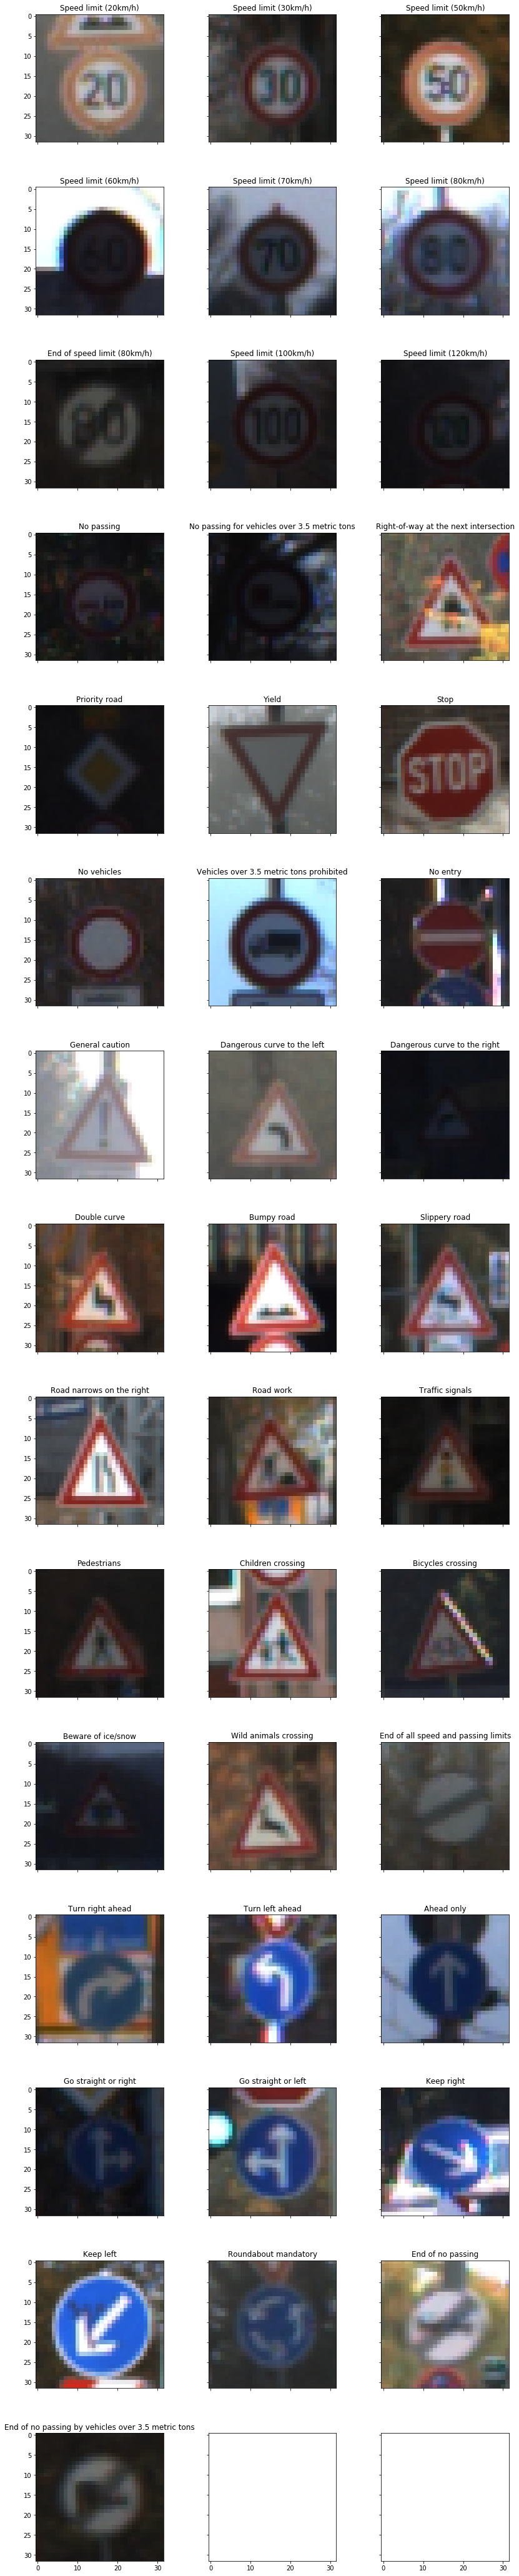

In [6]:
if(show_visualization_flag == 1):
    ### Data exploration visualization code goes here.
    ### Feel free to use as many code cells as needed.
    import matplotlib.pyplot as plt
    import math
    # Visualizations will be shown in the notebook.
    %matplotlib inline
    from PIL import Image
    from mpl_toolkits.axes_grid1 import ImageGrid

    ############
    n_cols=3
    n_rows=math.ceil(n_classes/n_cols)
    fig = plt.figure(figsize=(5*n_cols,5*n_rows))   # give max size, scales with screen size
    grid = ImageGrid(fig, 111,                      # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # creates n_rows x n_cols grid of axes
                     axes_pad=1,                    # pad between axes in inch.
                     )

    for i in range(n_classes):
        grid[i].imshow(class_dist[i][100], interpolation='none')  # The AxesGrid object work as a list of axes.
        #grid[i].show(df.plot(kind='barh', figsize = (15, 20)))
        grid[i].set_title(class_names[i])

    plt.show()
    ############
else:
    print('This cell is Skipped')

## Visualise the frequency of all classes in the training set

In [7]:
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

freq = list()
names = list()
for i in range(n_classes):
    freq.append(len(class_dist[i]))
    names.append(class_names[i])

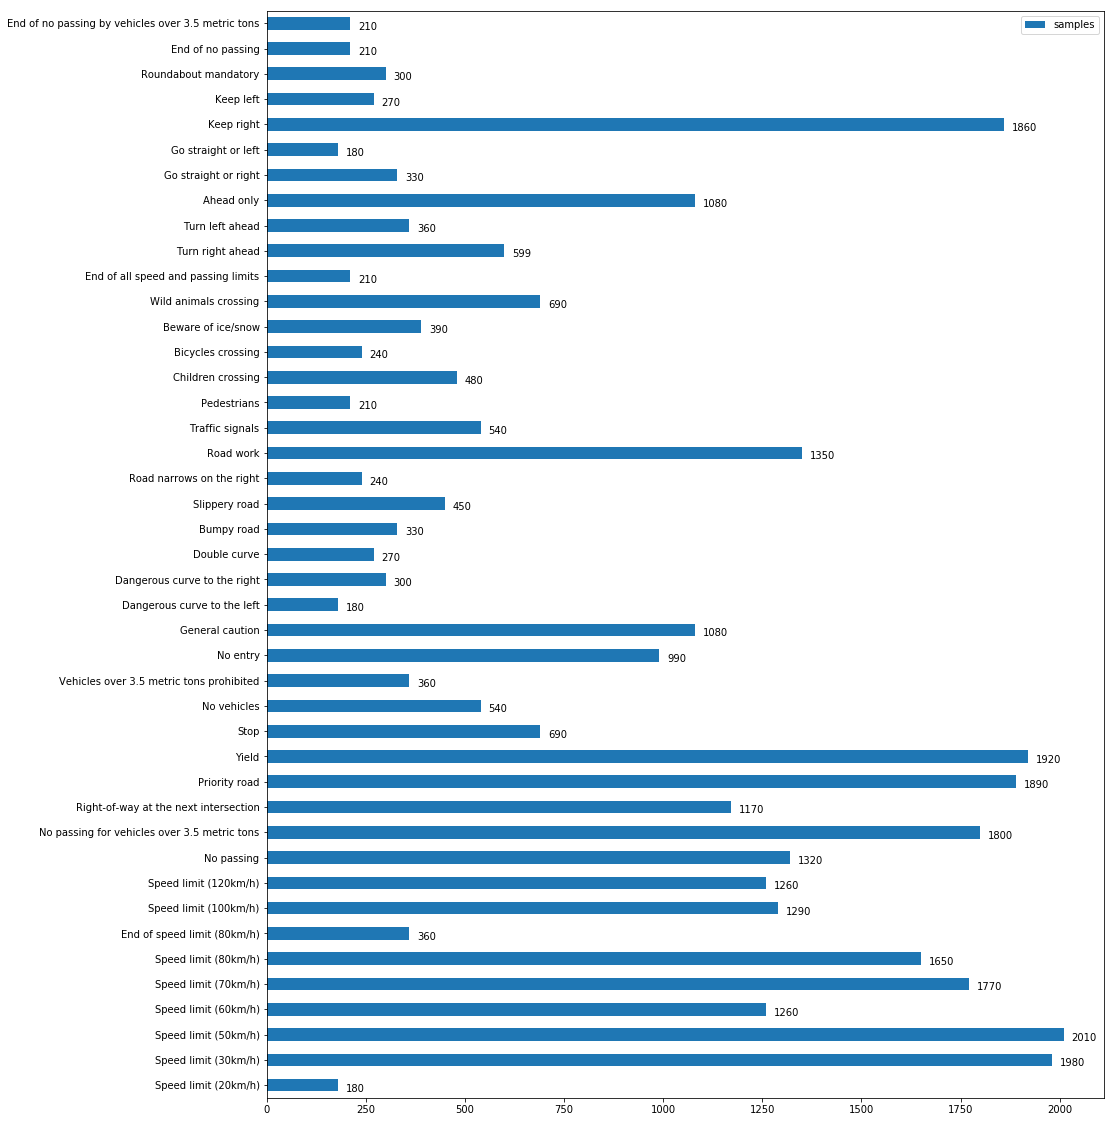

In [8]:
if(show_visualization_flag == 1):
    df = pd.DataFrame({'samples':freq},index=names)
    p = df.plot(kind='barh', figsize = (15, 20))

    rects = p.patches

    for rect, label in zip(rects,freq):
        w = rect.get_width()
        p.text(w+20, rect.get_y(), label)

else:
    print('This cell is Skipped')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

* Contrast Limited Adaptive Histogram Equlaization is used to remove the lighting invariance among the images
> in short it improves contrast  
> http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

* After the above step, mean normalization is applied to the dataset (code in data Augmentation section below)

* All the image channels are used for training (grayscale conversion not done), as color channels might give an extra degree of freedom to the model to learn from

* The dataset is visibly unbalanced as found in exploration section
>To balance out the dataset we augment the images and create extra samples

In [9]:
if(preprocessing_flag == 1):
    ### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
    ### Feel free to use as many code cells as needed.
    from tqdm import tqdm
    import warnings
    import pickle
    import os
    from skimage import exposure

    ### Histogram Equilization
    def normalized_image(image_data):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in tqdm(image_data)])

    if(apply_clahe_flag == 1):
        print('Normalizing Training Images...')
        X_train_clahe = normalized_image(X_train)

        print('\nNormalizing Validation Images...')
        X_valid_clahe = normalized_image(X_valid)

        print('\nNormalizing Test Images...')
        X_test_clahe = normalized_image(X_test)

        data_preparation_checkpoint = dict() #data prep dictionary
        data_preparation_checkpoint_file = 'preprocessed_data_dump' #data prep file

        data_preparation_checkpoint['X_train_clahe'] = X_train_clahe
        data_preparation_checkpoint['y_train_clahe'] = y_train
        data_preparation_checkpoint['X_test_clahe'] = X_test_clahe
        data_preparation_checkpoint['y_test_clahe'] = y_test
        data_preparation_checkpoint['X_valid_clahe'] = X_valid_clahe
        data_preparation_checkpoint['y_valid_clahe'] = y_valid
        data_preparation_checkpoint['class_names_to_indices'] = class_names

else:
    print('This cell is Skipped')
    #skip if data loaded from pckl

This cell is Skipped


In [10]:
if(preprocessing_flag == 1):
    if(apply_clahe_flag == 1):
        if not os.path.isfile(data_preparation_checkpoint_file):
            print('writing pickle file for data_preparation_checkpoint')
            try:
                with open(data_preparation_checkpoint_file, 'wb') as dumpfile:
                    pickle.dump(data_preparation_checkpoint, dumpfile, pickle.HIGHEST_PROTOCOL)
                    print('data written to data_preparation_checkpoint')
            except Exception as ex:
                print('Unable to save data to', data_preparation_checkpoint_file, ':', ex)
                raise

        del X_train_clahe
        del X_test_clahe
        del X_valid_clahe
else:
    print('This cell is Skipped')
    #skip if data loaded from pckl

This cell is Skipped


### Loading preprocessed data

In [11]:
import pickle
import os

data_preparation_checkpoint_file = 'preprocessed_data_dump' #data prep file
with open(data_preparation_checkpoint_file, 'rb') as readfile:
    read_data = pickle.load(readfile)

X_train_final = read_data['X_train_clahe']
y_train_final = read_data['y_train_clahe']
X_test_final  = read_data['X_test_clahe' ]
y_test_final  = read_data['y_test_clahe' ]
X_valid_final = read_data['X_valid_clahe']
y_valid_final = read_data['y_valid_clahe']

class_names   = ()
class_names   = read_data['class_names_to_indices']

del read_data

## Data Augmentation
* ImageDataGenerator provided by keras provides a wide variety of configuration parameters to generate augmented images from limited set of training images
* Augmentation applied:-
>* rotation
>* horizontal shift
>* vertical shift
>* shear
>* zoom in/out

### 1) Creating a Generator

In [12]:
if(preprocessing_flag == 1):
    import keras
    from keras.preprocessing.image import ImageDataGenerator

    datagen = keras.preprocessing.image.ImageDataGenerator(
    #    featurewise_center=False,
    #    samplewise_center=False,
    #    featurewise_std_normalization=False,
    #    samplewise_std_normalization=False,
    #    zca_whitening=False,
        rotation_range=12,
    #   width_shift_range=0.2, dosent train well maybe overkill
    #   height_shift_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
    #    channel_shift_range=0.,
        fill_mode='nearest',
    #    cval=0.,
        horizontal_flip=False,
        vertical_flip=False,
    #    rescale=None,
    #    rescale=1./255,
        dim_ordering="tf")

### 2) Mean Normalization of data

In [13]:
from tqdm import tqdm
import numpy as np

def scale(image):
    mean_subtracted = image - image.mean(axis=(0,1))
    return mean_subtracted

def mean_norm(image_samples):
    return np.array([scale(image) for image in tqdm(image_samples)])

X_train_final = (mean_norm(X_train_final)).astype('float32')
X_valid_final = (mean_norm(X_valid_final)).astype('float32')
X_test_final = (mean_norm(X_test_final)).astype('float32')

#print(np.shape(X_test_final))
#print(np.shape(y_test_final))

100%|██████████| 12630/12630 [00:00<00:00, 15830.43it/s]


In [14]:
class_dist_new = dict()
n_train = np.shape(X_train_final)[0]

for i in range(n_train):
    if y_train_final[i] in class_dist_new:
        class_dist_new[y_train_final[i]].append(X_train_final[i])
    else:
        class_dist_new[y_train_final[i]] = [X_train_final[i]]

### 3) Augmenting and Balancing the dataset

* Augmenting the normalised training data using generator created above
* 5000 images per class are generated

In [15]:
if(preprocessing_flag == 1):
    import matplotlib.pyplot as plt
    import math
    import numpy as np

    #image generator
    gen_counter = 1
    max_limit = 5000

    X_aug_train = np.empty((0,32,32,3))
    y_aug_train = np.empty(0,dtype='uint8')
    #print(np.shape(X_aug_train))
    #print(np.shape(y_aug_train))

    print("initial training dataset shape", np.shape(X_aug_train), np.shape(y_aug_train))

    n_classes = len(class_names)
    for i in tqdm(range(n_classes)):
        X_temp = np.empty((0,32,32,3))
        y_temp = np.empty(0,dtype='uint8')
        z0 = np.array(class_dist_new[i])
        z1 = np.full((np.shape(z0)[0],), i, dtype=np.uint8)
        for X, y in datagen.flow(z0, z1, batch_size=100):       
            X_temp = np.concatenate((X_temp, X), axis=0)
            y_temp = np.concatenate((y_temp, y), axis=0)
            if(np.shape(X_temp)[0] >= max_limit):
                #print(i, np.shape(X_temp), np.shape(y_temp))
                break
        X_aug_train = np.concatenate((X_aug_train, X_temp[:5000]), axis=0)
        y_aug_train = np.concatenate((y_aug_train, y_temp[:5000]), axis=0)

    print("final training dataset shape", np.shape(X_aug_train), np.shape(y_aug_train))

    del X_temp
    del y_temp

else:
    print('This cell Skipped')
    #skip if data loaded from pckl

This cell Skipped


In [16]:
if(preprocessing_flag == 1):
    #del z0
    #del z1
    #del class_dist_new
    #del data_augmentation_checkpoint

    from tqdm import tqdm
    import warnings
    import pickle
    import os

    data_augmentation_checkpoint = dict() #data prep dictionary
    data_augmentation_checkpoint_file = 'augmented_data_dump' #data prep file
    data_augmentation_checkpoint['X_aug_clahe'] = X_aug_train
    data_augmentation_checkpoint['y_aug_clahe'] = y_aug_train

    if not os.path.isfile(data_augmentation_checkpoint_file):
        print('writing pickle file for data_augmentation_checkpoint')
        try:
            with open(data_augmentation_checkpoint_file, 'wb') as dumpfile:
                pickle.dump(data_augmentation_checkpoint, dumpfile, pickle.HIGHEST_PROTOCOL)
                print('data written to data_augmentation_checkpoint')
        except Exception as ex:
            print('Unable to save data to', data_augmentation_checkpoint_file, ':', ex)
            raise

    del X_aug_train
    del y_aug_train

else:
    print('This cell Skipped')
    #skip if data loaded from pckl

This cell Skipped


In [17]:
import pickle
import os
data_augmentation_checkpoint_file = 'augmented_data_dump' #data prep file
with open(data_augmentation_checkpoint_file, 'rb') as readfile:
    read_data = pickle.load(readfile)
    X_train_final = read_data['X_aug_clahe']
    y_train_final = read_data['y_aug_clahe']
    print('X_train_final and y_train_final augmented dataset loaded')

del read_data

X_train_final and y_train_final augmented dataset loaded


### Model Architecture and Results

What architecture was chosen?
>* I used Lenet as the beginning point.
>* Augmenting the image data gave me the initial Accuracy
>* But the model was overfitting the test data, giving test accuracy by 99.94% and validation accuracy of around 96%
>* Then I proceeded with adding the dropout layers to the flattened layers of the network
>* this provided me with the much needed generalization

Why did you believe it would be relevant to the traffic sign application?
>* Lenet is a tried and tested CNN architecture whose variants hold good for many applications
>* Hence decided to give it a try for traffic sign classification and it worked a charm
>* For more detailed insights Refered:- http://publications.lib.chalmers.se/records/fulltext/238914/238914.pdf

How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
#### My final Model Results Were:-

>* #### training set accuracy of 99.0
>* #### validation set accuracy of 97.6
>* #### test set accuracy of 96.0

### Explanation for Model Architecture and Parameters

The CNN model structure is as follows:-
> * Convolutional. Input = 32x32x3. Output = 28x28x6.
> * Activation.   conv1 = tf.nn.relu(conv1)
> * Pooling. Input = 28x28x6. Output = 14x14x6.
> * Convolutional. Output = 10x10x16.
> * Activation.
> * Pooling. Input = 10x10x16. Output = 5x5x16.
> * Flatten. Input = 5x5x16. Output = 400.
> * Fully Connected. Input = 400. Output = 120.
> * Dropout 
> * Activation.
> * Fully Connected. Input = 120. Output = 84.
> * Dropout 
> * Activation.
> * Fully Connected. Input = 84. Output = 43 classes of labels.


* Introduced dropouts in fully connected flattened layers to improve generalization  
* Did not add dropout in covolutional layers, allowed model to learn all the features
* Doing the above 2 steps allows the model to learn all features, but predict using only a few (effect of droupout)
* adding dropout showed test-set accuracy improvement of around 0.8%


### Training
EPOCHS = 30
* model training flattens out after around 20 EPOCHs (to 99.2%) so 30 seems adequate

BATCH_SIZE = 128

* didn't find much improvement by 256
* it slowed validation set improvements to negligible amount

> end result for 128: validation_accuracy = 97.6% test_accuracy for 128 = 96.1%  
> end result for 256: validation_accuracy = 97.3% test_accuracy for 256 = 96.0%

OPTIMIZER
* used Adam optimizer with learning rate 0.001

In [18]:
if(training_flag == 1):
    from sklearn.utils import shuffle

    X_train_final, y_train_final = shuffle(X_train_final, y_train_final)

else:
    print('This cell Skipped')

This cell Skipped


In [19]:
import tensorflow as tf

EPOCHS = 30
#model training flattens out after around 20 EPOCHs (to 99.2%) so 30 seems adequate

#BATCH_SIZE = 64
BATCH_SIZE = 128
#BATCH_SIZE = 256

#didn't find much improvement by 256
#it just slowed validation set improvements

#end result for 128: validation_accuracy = 97.6% test_accuracy for 128 = 96.1%
#end result for 256" validation_accuracy = 97.3% test_accuracy for 256 = 96.0%

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Dropout between 3 & 4 classification layers
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Dropout between 4 & 5 classification layers
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 classes of labels.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [22]:
rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [24]:
if(training_flag == 1):
    ### Train your model here.
    ### Calculate and report the accuracy on the training and validation set.
    ### Once a final model architecture is selected, 
    ### the accuracy on the test set should be calculated and reported as well.
    ### Feel free to use as many code cells as needed.
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train_final)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train_final, y_train_final = shuffle(X_train_final, y_train_final)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_final[offset:end], y_train_final[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})

            validation_accuracy = evaluate(X_valid_final, y_valid_final)
            training_accuracy = evaluate(X_train_final, y_train_final)
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

            if(((i) % 5) == 0):
                #saver.save(sess, './lenet2/model')
                saver.save(sess, './lenetx/model')
                print("Model saved after Epoch:", i)

        #saver.save(sess, './lenet2/model')
        saver.save(sess, './lenetx/model')
        print("Model saved")
else:
    print('This cell Skipped')

This cell Skipped


Training...

EPOCH 1 ...
Training Accuracy = 0.877
Validation Accuracy = 0.893

Model saved after Epoch: 0
EPOCH 2 ...
Training Accuracy = 0.927
Validation Accuracy = 0.934

EPOCH 3 ...
Training Accuracy = 0.949
Validation Accuracy = 0.947

EPOCH 4 ...
Training Accuracy = 0.961
Validation Accuracy = 0.955

EPOCH 5 ...
Training Accuracy = 0.965
Validation Accuracy = 0.958

EPOCH 6 ...
Training Accuracy = 0.971
Validation Accuracy = 0.963

Model saved after Epoch: 5
EPOCH 7 ...
Training Accuracy = 0.973
Validation Accuracy = 0.966

EPOCH 8 ...
Training Accuracy = 0.976
Validation Accuracy = 0.965

EPOCH 9 ...
Training Accuracy = 0.978
Validation Accuracy = 0.969

EPOCH 10 ...
Training Accuracy = 0.980
Validation Accuracy = 0.966

EPOCH 11 ...
Training Accuracy = 0.981
Validation Accuracy = 0.967

Model saved after Epoch: 10
EPOCH 12 ...
Training Accuracy = 0.981
Validation Accuracy = 0.966

EPOCH 13 ...
Training Accuracy = 0.985
Validation Accuracy = 0.971

EPOCH 14 ...
Training Accuracy = 0.984
Validation Accuracy = 0.971

EPOCH 15 ...
Training Accuracy = 0.984
Validation Accuracy = 0.967

EPOCH 16 ...
Training Accuracy = 0.988
Validation Accuracy = 0.973

Model saved after Epoch: 15
EPOCH 17 ...
Training Accuracy = 0.987
Validation Accuracy = 0.971

EPOCH 18 ...
Training Accuracy = 0.987
Validation Accuracy = 0.967

EPOCH 19 ...
Training Accuracy = 0.989
Validation Accuracy = 0.969

EPOCH 20 ...
Training Accuracy = 0.988
Validation Accuracy = 0.973

EPOCH 21 ...
Training Accuracy = 0.989
Validation Accuracy = 0.973

Model saved after Epoch: 20
EPOCH 22 ...
Training Accuracy = 0.988
Validation Accuracy = 0.970

EPOCH 23 ...
Training Accuracy = 0.989
Validation Accuracy = 0.973

EPOCH 24 ...
Training Accuracy = 0.990
Validation Accuracy = 0.972

EPOCH 25 ...
Training Accuracy = 0.990
Validation Accuracy = 0.966

EPOCH 26 ...
Training Accuracy = 0.991
Validation Accuracy = 0.973

Model saved after Epoch: 25
EPOCH 27 ...
Training Accuracy = 0.990
Validation Accuracy = 0.974

EPOCH 28 ...
Training Accuracy = 0.992
Validation Accuracy = 0.972

EPOCH 29 ...
Training Accuracy = 0.991
Validation Accuracy = 0.970

EPOCH 30 ...
Training Accuracy = 0.990
Validation Accuracy = 0.976

Model saved

### Test Accuracy ~ 96%

In [25]:
import tensorflow as tf

with tf.Session() as sess:
    #my_loader = tf.train.import_meta_graph('./lenet2/model.meta')
    #my_loader.restore(sess, tf.train.latest_checkpoint('./lenet2/'))
    #earlier trained lenet-2 gave 96% [trained on GPU]
    #recently trained lenet-x gave 95.9% [trained on CPU]
    
    my_loader = tf.train.import_meta_graph('./lenetx/model.meta')
    my_loader.restore(sess, tf.train.latest_checkpoint('./lenetx/'))
    sess = tf.get_default_session()

    test_accuracy = evaluate(X_test_final, y_test_final)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.959


---

## Step 3: Test a Model on New Downloaded Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

>* ##### Loading the downloaded images in 1st section below
>* ##### Preprocessing them in 2nd section below
>* ##### Running prediction and displaying them in 3rd section below
>* ##### Analysing the results in 4th section below

### Load the Downloaded Images

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import math
import os
# Visualizations will be shown in the notebook.
%matplotlib inline
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

############
#n_cols=5
#n_rows=6
#fig = plt.figure(figsize=(5*n_cols,5*n_rows))   # give max size, scales with screen size
#grid = ImageGrid(fig, 111,                      # similar to subplot(111)
#                 nrows_ncols=(n_rows, n_cols),  # creates n_rows x n_cols grid of axes
#                 axes_pad=1,                    # pad between axes in inch.
#                 )
############
img_arr = []
disp_arr = []

i=0
for file in os.listdir('new-images'):
    img = Image.open('new-images/' + file)
    img = img.resize((32,32))
    disp_img = img.resize((128,128))
    ###grid[i].imshow(img, interpolation='none')  # The AxesGrid object work as a list of axes.
    i+=1
    img_arr.append(np.asarray(img))
    disp_arr.append(np.asarray(disp_img))
###plt.show()
#print(np.shape(img_arr))

### Preprocessing the downloaded images for feeding to the model for detection

In [27]:
from tqdm import tqdm
import warnings
import pickle
import os
from skimage import exposure

def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in tqdm(image_data)])
    
from tqdm import tqdm
import numpy as np

def scale(image):
    mean_subtracted = image - image.mean(axis=(0,1))
    return mean_subtracted

def mean_norm(image_samples):
    return np.array([scale(image) for image in tqdm(image_samples)])

data = mean_norm(normalized_image(img_arr))
print(np.shape(img_arr))

100%|██████████| 29/29 [00:00<00:00, 15389.02it/s]

(29, 32, 32, 3)


### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#tf.reset_default_graph()
#print(type(class_dist[0][1]))

with tf.Session() as sess:
    #saver.restore(sess, './lenetx/model')
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet2/'))
    saver.restore(sess, tf.train.latest_checkpoint('./lenetx/'))
    new_logits = sess.run(tf.argmax(logits, 1), feed_dict={x:data, keep_prob:1.0})

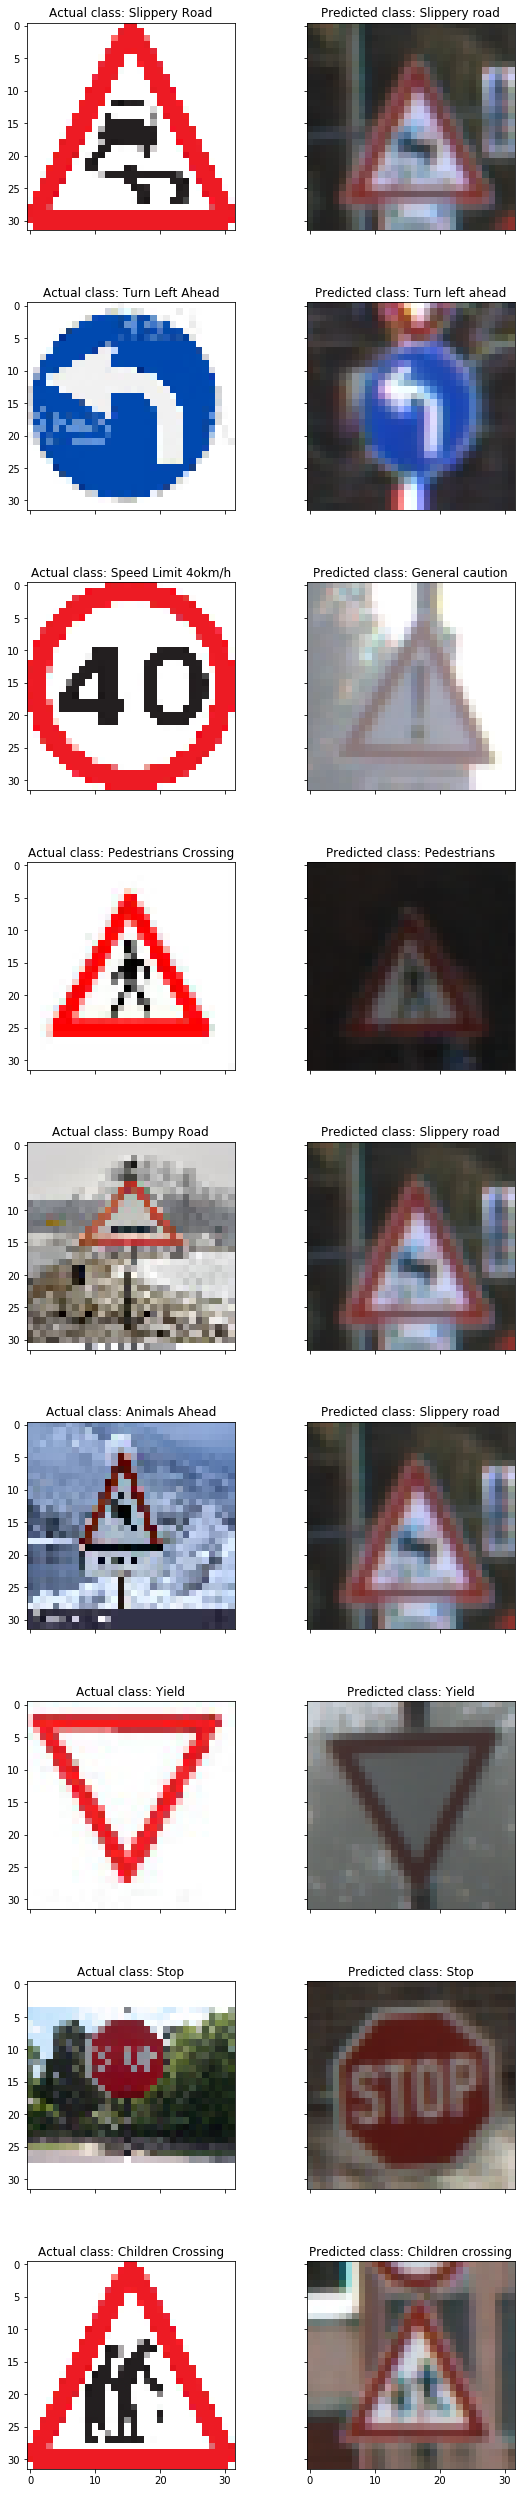

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import math
import os
%matplotlib inline
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

############
n_cols=2
n_rows=9
fig = plt.figure(figsize=(5*n_cols,5*n_rows))   # give max size, scales with screen size
grid = ImageGrid(fig, 111,                      # similar to subplot(111)
                 nrows_ncols=(n_rows, n_cols),  # creates n_rows x n_cols grid of axes
                 axes_pad=1,                    # pad between axes in inch.
                 )
############
"""
i=0
j=0;
for n in new_logits:
    #print(class_names[n])
    grid[i].imshow(img_arr[j], interpolation='none')  # The AxesGrid object work as a list of axes.
    grid[i].set_title(class_names[n])
    #print(type(class_dist[n][0]))
    grid[i+1].imshow(class_dist[n][100], interpolation='none')  # The AxesGrid object work as a list of axes.
    #grid[i+1].set_title(class_names[n])
    grid[i+1].set_title(n)
    i+=2
    j+=1
    
plt.show()
"""
##############

i=0
j=0;
names = ['Slippery Road', 'Turn Left Ahead', 'Speed Limit 4okm/h', 'Pedestrians Crossing', 
         'Bumpy Road', 'Animals Ahead', 'Yield', 'Stop', 'Children Crossing']
for names,n in zip(names,[0,3,4,5,6,7,8,9,10,11]):
#for n in new_logits:
    #print(class_names[n])
    grid[i].imshow(img_arr[n], interpolation='none')  # The AxesGrid object work as a list of axes.
    grid[i].set_title('Actual class: '+names)
    grid[i+1].imshow(class_dist[new_logits[n]][100], interpolation='none')  # The AxesGrid object work as a list of axes.
    grid[i+1].set_title('Predicted class: '+class_names[new_logits[n]])
    i+=2
    j+=1
    
plt.show()

### Calculate the accuracy for these new images. 
For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.  

I downloaded 9 images from online sources:-  
>* Out of those Correctly predicted ones are = 7
>* Total number of images downloaded = 9
>* Prediction Accuracy = 7/9 = 77.77%
>* Prediction Accuracy is less than test set accuracy of 96%
   
   
### Discussion on why some online downloaded images are misclassified?
* model is predicting correctly for the images where major part of the image is the traffic sign
* but, for the images where traffic sign is somewhere in the image, the model does not perform well. This would be expected as our training dataset does not have those kinds of images. Any amount of augmentation (especially the zoom augmentation) cannot be helpful if the traffic sign in the image to be predicted is less than 40% of the image
* Also model misclassified the 40km/h image as General Caution, because there was no data for it in the training set

## Class Name Index

In [37]:
for i in range(len(class_names)):
    print(i, '==>', class_names[i])

0 ==> Speed limit (20km/h)
1 ==> Speed limit (30km/h)
2 ==> Speed limit (50km/h)
3 ==> Speed limit (60km/h)
4 ==> Speed limit (70km/h)
5 ==> Speed limit (80km/h)
6 ==> End of speed limit (80km/h)
7 ==> Speed limit (100km/h)
8 ==> Speed limit (120km/h)
9 ==> No passing
10 ==> No passing for vehicles over 3.5 metric tons
11 ==> Right-of-way at the next intersection
12 ==> Priority road
13 ==> Yield
14 ==> Stop
15 ==> No vehicles
16 ==> Vehicles over 3.5 metric tons prohibited
17 ==> No entry
18 ==> General caution
19 ==> Dangerous curve to the left
20 ==> Dangerous curve to the right
21 ==> Double curve
22 ==> Bumpy road
23 ==> Slippery road
24 ==> Road narrows on the right
25 ==> Road work
26 ==> Traffic signals
27 ==> Pedestrians
28 ==> Children crossing
29 ==> Bicycles crossing
30 ==> Beware of ice/snow
31 ==> Wild animals crossing
32 ==> End of all speed and passing limits
33 ==> Turn right ahead
34 ==> Turn left ahead
35 ==> Ahead only
36 ==> Go straight or right
37 ==> Go straight 

In [38]:
img_arr = []
for file in os.listdir('new-images'):
    img = Image.open('new-images/' + file)
    img = img.resize((32,32))
    img_arr.append(np.asarray(img))
    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import math
import os
%matplotlib inline
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid

all_softmax = []
with tf.Session() as sess:
    #loader = tf.train.import_meta_graph('lenet2/model.meta')
    #loader.restore(sess, tf.train.latest_checkpoint('lenet2/'))
    loader = tf.train.import_meta_graph('lenetx/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('lenetx/'))
    
    new_logits = sess.run(logits, feed_dict={x:data, keep_prob:1.0})
    temp = sess.run(tf.nn.softmax(new_logits))
    all_softmax.append(temp)
    top_five = sess.run(tf.nn.top_k(temp, k=5))
    #print(x)

### Analyze Performance

### grayscale images vs colored images
* grayscale images might lead to loss of data in colored channels
* some features might be very prominent in certain color channels
* hence using colored images for training

### perspective transform required or not?
* perspective transfrom is used for augmentation of training images
* this is done so as to make the model generalize well for detecting images taken from different angles
* the keras generator mentioned above in the notebook does no do this transform
* adding perspective transform migh improve the model test accuracy even further

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Displaying top softmax values
* #### plotting the graph of all softmax probabilities, instead of printing 5 values
* #### better to visualise that way

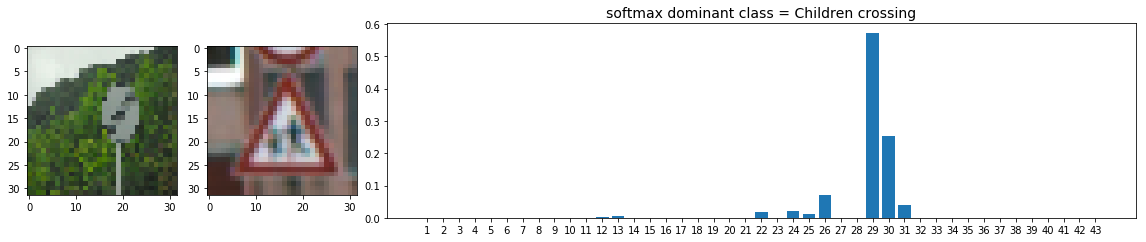

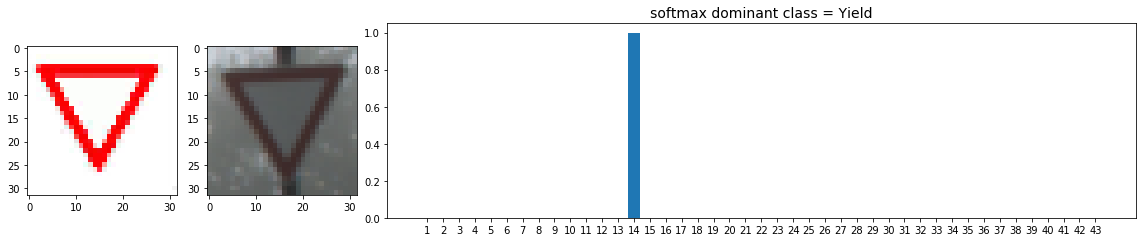

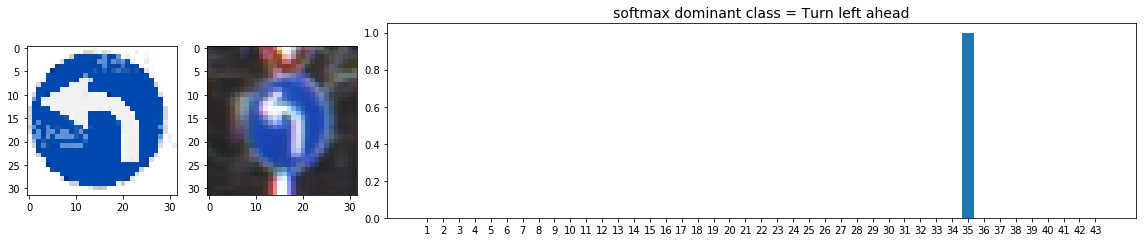

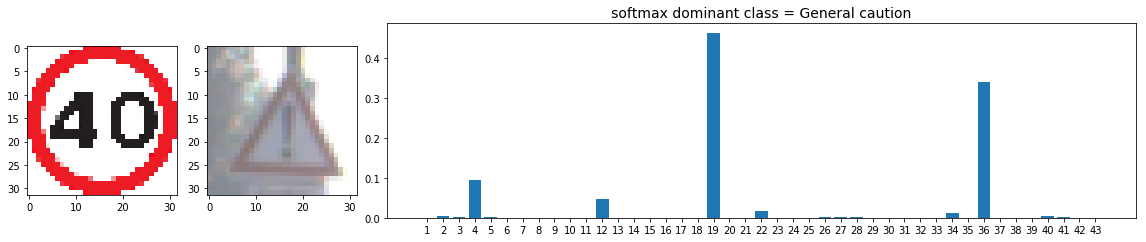

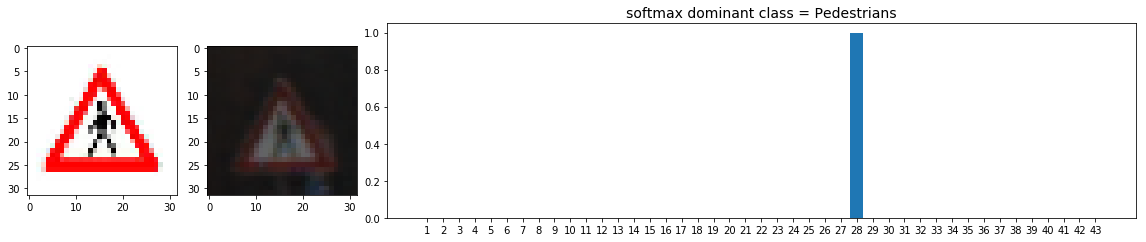

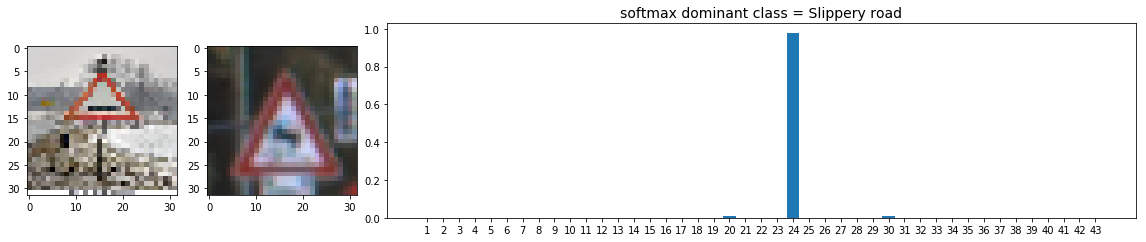

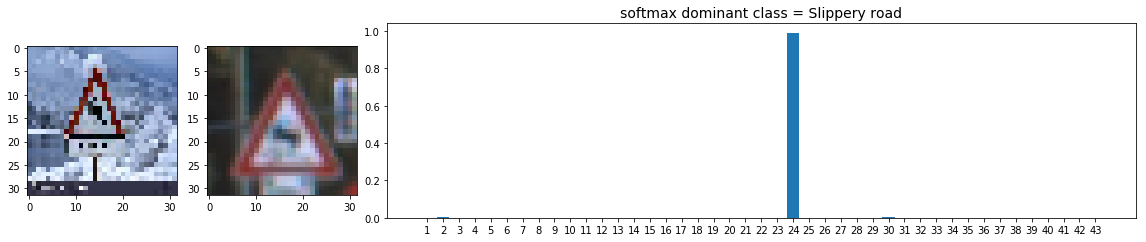

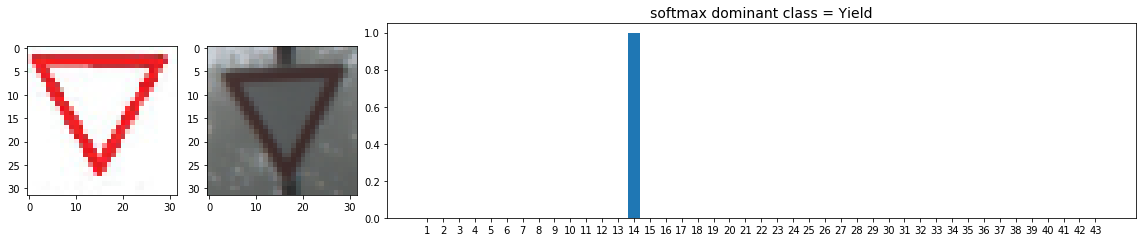

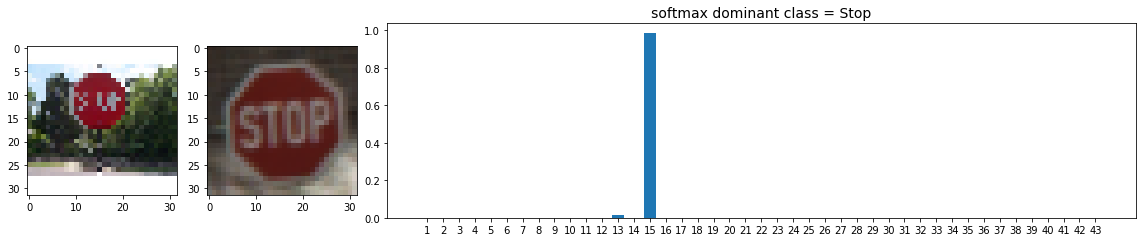

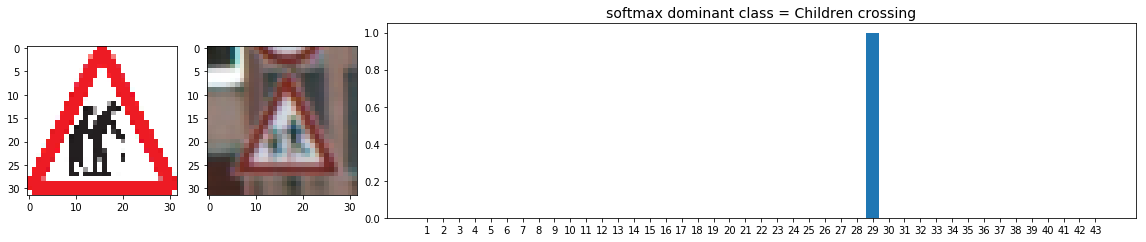

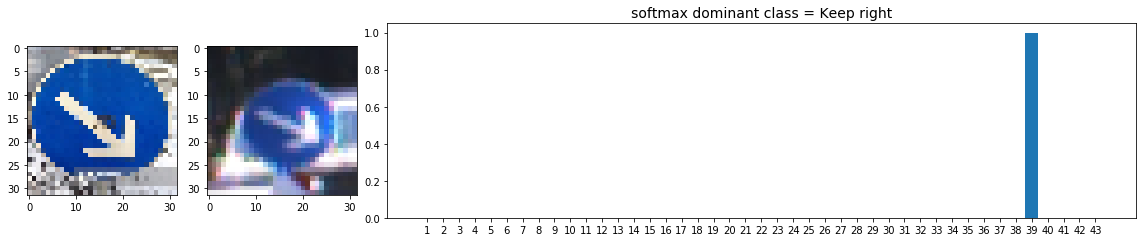

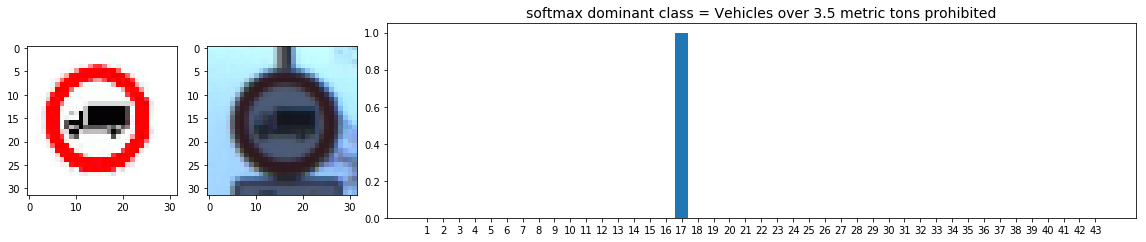

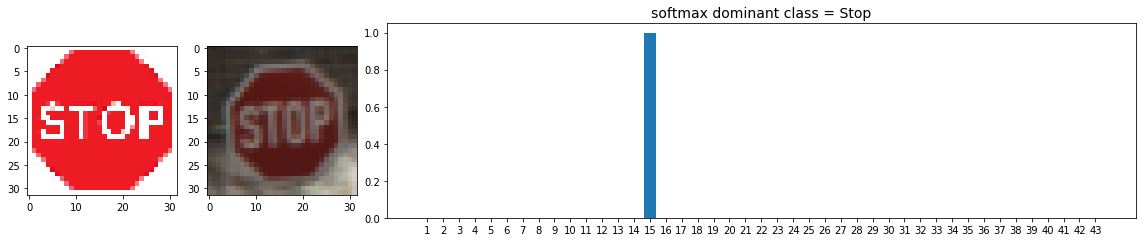

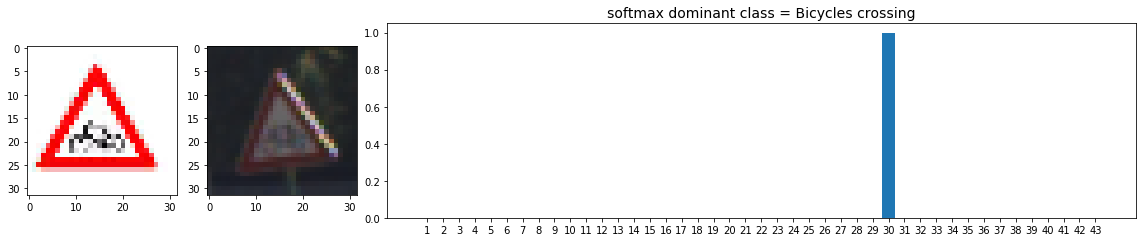

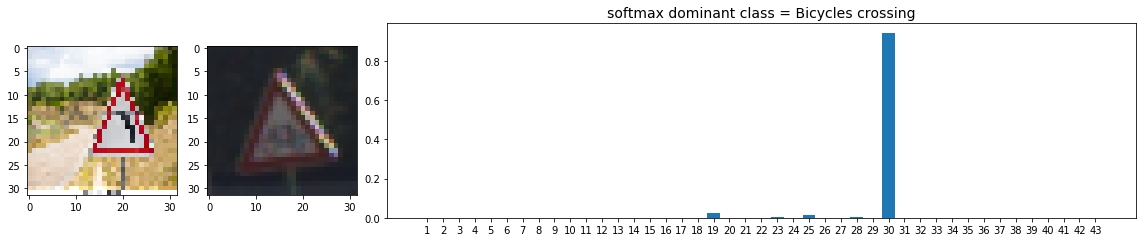

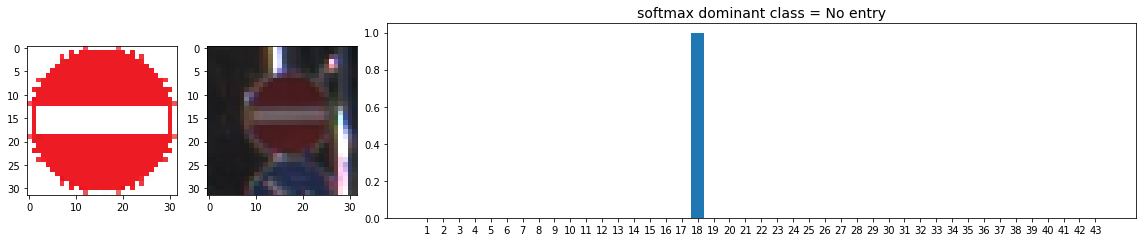

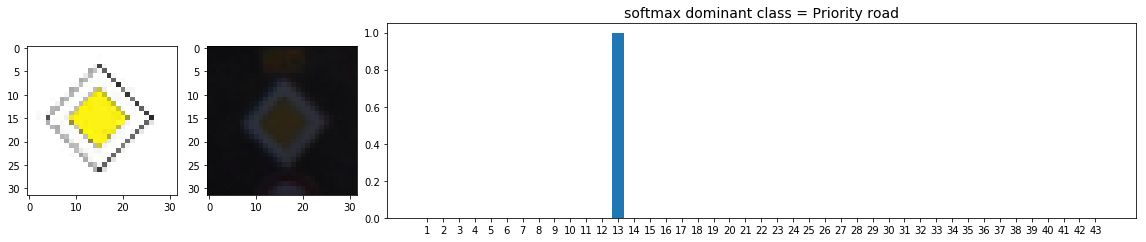

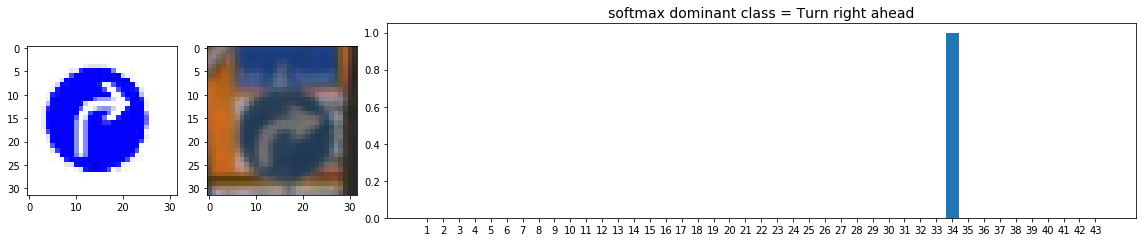

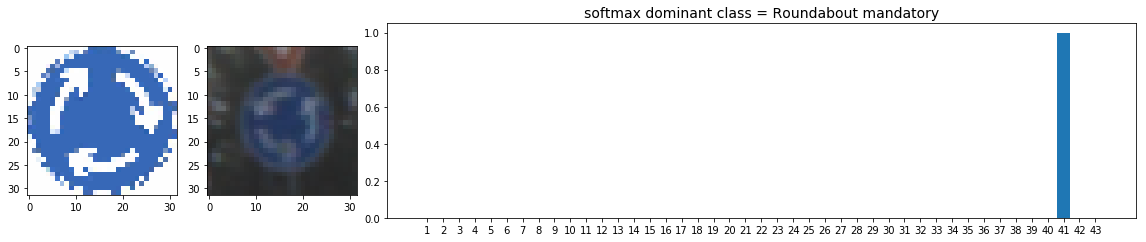

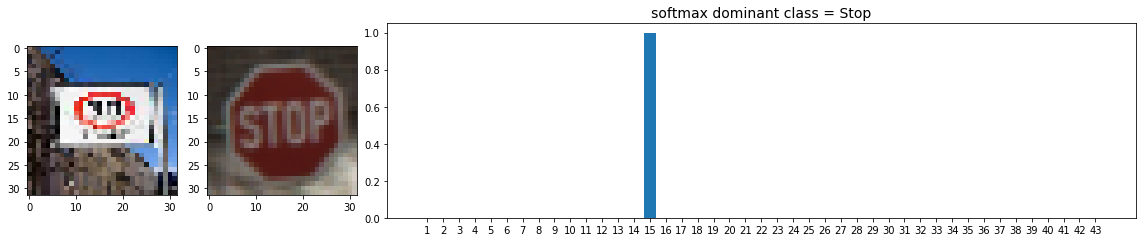

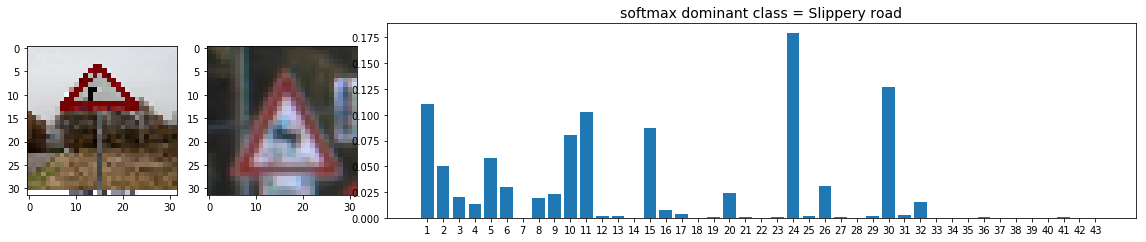

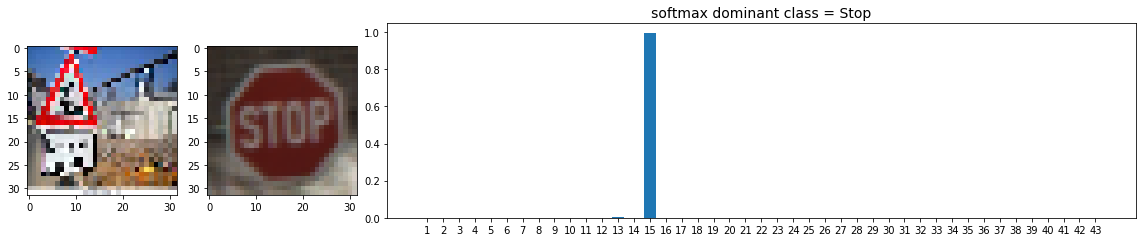

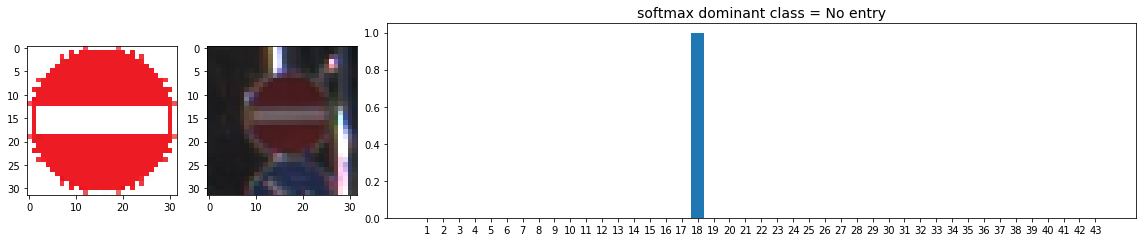

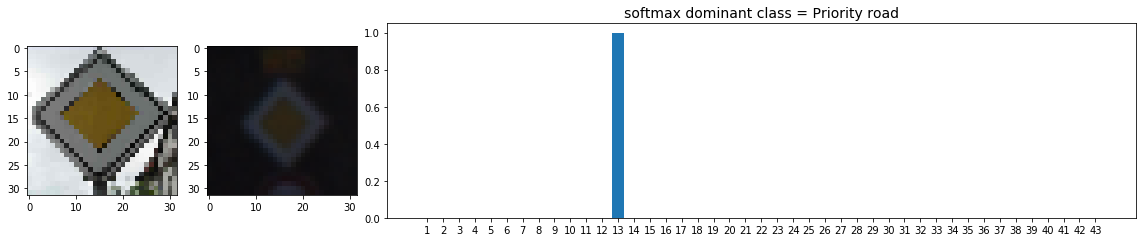

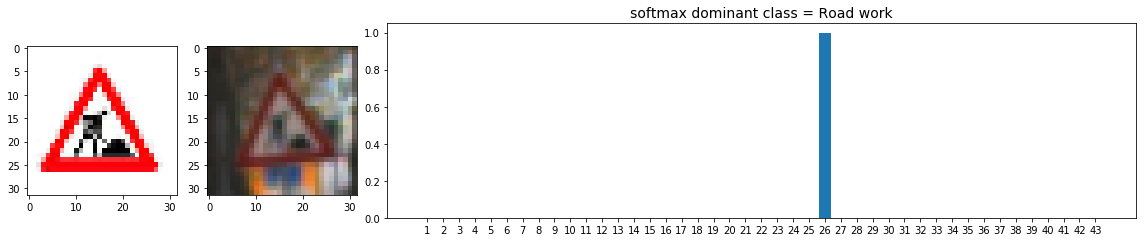

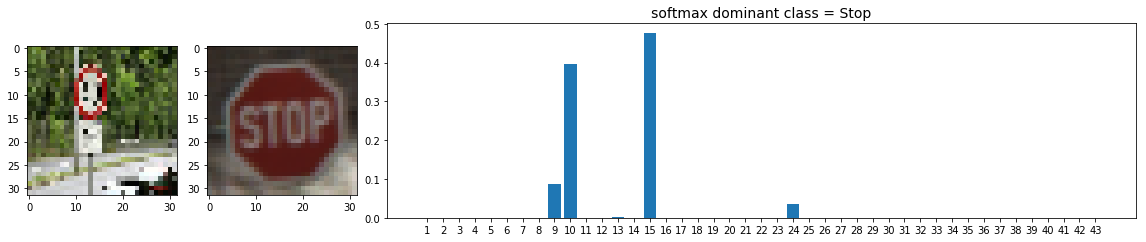

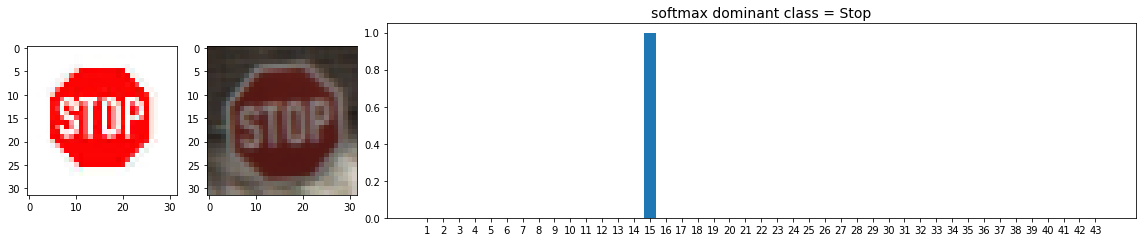

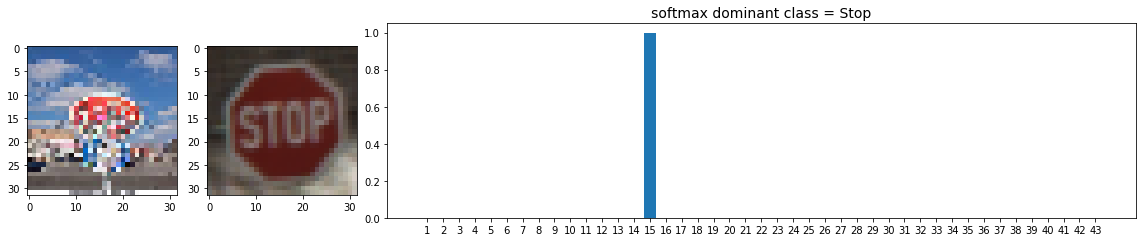

In [39]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#import matplotlib.pyplot as plt
#plt.plot(list(range(1,44,1)),all_softmax[0][1],'ro')

xticks=list(range(1,44,1))
loaded_images = list(range(1,29,1))
for i in loaded_images:
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 3), gridspec_kw = {'width_ratios':[1,1,5]})
    f.tight_layout()
    ax1.imshow(img_arr[i])
    ax1.set_title('', fontsize=4)
    ax2.imshow(class_dist[top_five.indices[i][0]][100], interpolation='none')  # The AxesGrid object work as a list of axes.
    #ax3.plot(list(range(1,44,1)),all_softmax[0][i])
    ax3.bar(list(range(1,44,1)),all_softmax[0][i])
    ax3.set_xticks(xticks)
    ax3.set_title('softmax dominant class = '+class_names[top_five.indices[i][0]], fontsize=14)
    plt.subplots_adjust(left=0., right=0.7, top=0.9, bottom=0.)
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [34]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    #edit
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    #activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

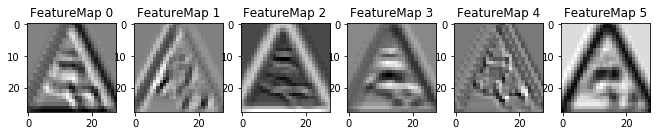

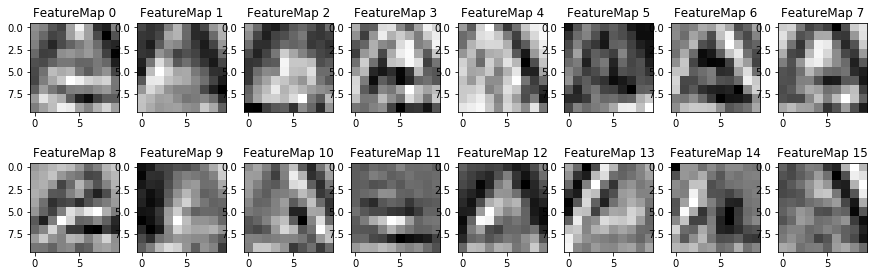

In [35]:
tf.reset_default_graph()

mu=0
sigma=0.1

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
conv1_x   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
conv1 = tf.nn.relu(conv1)
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
conv2_x   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
conv2 = tf.nn.relu(conv2)
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

saver = tf.train.Saver()
with tf.Session() as sess:
    #saver.restore(sess, './lenet2/model')
    saver.restore(sess, './lenetx/model')
    
    outputFeatureMap(img_arr, conv1_x, activation_min=-1, activation_max=-1 ,plt_num=1)
    outputFeatureMap(img_arr, conv2_x, activation_min=-1, activation_max=-1 ,plt_num=2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**
* the image fed to diagnose activations is of class "slippery road ahead"
>* it is a triangular shaped image with car on a slippery road drawn on it

* layer one feature maps show the model learning to detect edges (something like a sobel filter)

* layer two feature maps are a bit unclear due to sampling down
* but overall they look to be trying to detect separate edges and other features in the image
* different feature maps have different areas highlighted, indicating search for different features

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 